In [1]:
# Adding the neccecary imports to our code
import numpy as np
import matplotlib.pyplot as plt
import pydot # conda install pydot
from matplotlib.colors import Normalize
import matplotlib.colors as mcolors
from data_structures import Graph,create_custom_graph,Forced_vertex

In [2]:
#type of data:
url_Les_Miserables_network  = '../data/LesMiserables.dot'
url_Rome_graph  = '../data/rome.dot'
url_Jazz_Network  = '../data/JazzNetwork.dot'
url_Small_Directed_Network  = '../data/noname.dot'
url_Pro_League_Network  = '../data/LeagueNetwork.dot'
url_Argumentation_network  = '../data/devonshiredebate_withclusters.dot'
url_Argumentation_network_for_part_five = '../data/devonshiredebate_withonlytwoclusters.dot'
url_Political_blogosphere_network  = '../data/polblogs.dot'


In [3]:
def initialize_Forced_vertices(graph):
    vertices = {v.id: Forced_vertex(v.id) for v in graph.vertices.values()}

    return vertices

def compute_forces(vertices, edge,edge_set, Cspring=2.0, Crep=1.0, l=1.0):
    for vertex in vertices.values():
        vertex.force.fill(0)

    for vertex_source in vertices.values():
        for vertex_target in vertices.values():
            if vertex_source.id != vertex_target.id:
                if not is_edge_between_vertices(vertex_source.id, vertex_target.id, edge_set): # Calculate repulsive forces between all nodes
                    direction = vertex_target.position - vertex_source.position
                    distance = np.linalg.norm(direction)
                    if distance > 0:
                        unit_vector = direction / distance
                        force = (Crep / distance ** 2) * unit_vector
                        vertex_target.force += force
                else: # Calculate atractive forces between all nodes
                    direction = vertex_source.position - vertex_target.position
                    distance = np.linalg.norm(direction)
                    if distance > 0:
                        unit_vector = direction / distance
                        force = Cspring * np.log10(distance / l) * unit_vector
                        vertex_target.force += force
def is_edge_between_vertices(source_id, target_id, edge_set):
    return (source_id, target_id) in edge_set or (target_id, source_id) in edge_set

def update_positions(vertices, dt=0.1, damping=0.99):
    max_movement = 0.0
    for vertex in vertices.values():
        movement = np.linalg.norm(vertex.force * dt)
        vertex.position += vertex.force * dt
        vertex.force *= damping
        max_movement = max(max_movement, movement)
    return max_movement

def visualize_layout(ax,vertices, edges,title):
    norms = [np.linalg.norm(vertex.force) for vertex in vertices.values()]
    norm = Normalize(vmin=min(norms), vmax=max(norms))
    for edge in edges:
        source_pos = vertices[edge.start.id].position
        target_pos = vertices[edge.end.id].position
        ax.plot([source_pos[0], target_pos[0]], [source_pos[1], target_pos[1]], 'k-', linewidth=0.2)
    for vertex in vertices.values():
        color_rgba = plt.cm.YlOrRd(norm(np.linalg.norm(vertex.force)))
        color_hex = mcolors.rgb2hex(color_rgba[:3])
        ax.plot(vertex.position[0], vertex.position[1], 'o', color=color_hex)
        ax.text(vertex.position[0], vertex.position[1], str(vertex.id), fontsize=8, ha='center', va='bottom', color="green")
        ax.set_title(title, fontsize=30)
def create_forced_graph(ax,graph,num_iterations=1000,Cspring = 2.0, Crep=1.0, l=1.0,e=0.05,learning_rate=0.1,title = ""):
    vertices = initialize_Forced_vertices(graph)
    edges = graph.edges
    edge_set = {(edge.start.id, edge.end.id) for edge in edges}
    k = 0
    max_movement = 1
    while k < num_iterations and max_movement > e:
        compute_forces(vertices, edges,edge_set)
        max_movement = update_positions(vertices,learning_rate)
        k += 1
        if max_movement <= e:
            print(k)
    visualize_layout(ax,vertices, edges,title)
    # Calculate stress
    # stress = calculate_stress(vertices)
    # print("Stress:", stress)

def calculate_stress(vertices, ideal_distances, actual_distances):
    num_vertices = len(vertices)

    stress = 0.0

    # Compute stress
    for i in range(num_vertices):
        for j in range(i+1, num_vertices):
            if ideal_distances[i][j] != 0:
                stress += ((actual_distances[i][j] - ideal_distances[i][j]) ** 2) / (ideal_distances[i][j] ** 2)

    return stress


In [4]:
G = pydot.graph_from_dot_file(url_Les_Miserables_network)[0]
#Convering the graph into our custom graph
graph = create_custom_graph(G)


# jazz network graph num itration = 578 (because of the threshold = 0.03 and the learning rate = 0.01 which decreaces over time.
# les Miserables graph num itration = 427 (because of the threshold = 0.05 and the learning rate = 0.1 which decreaces over time.


135


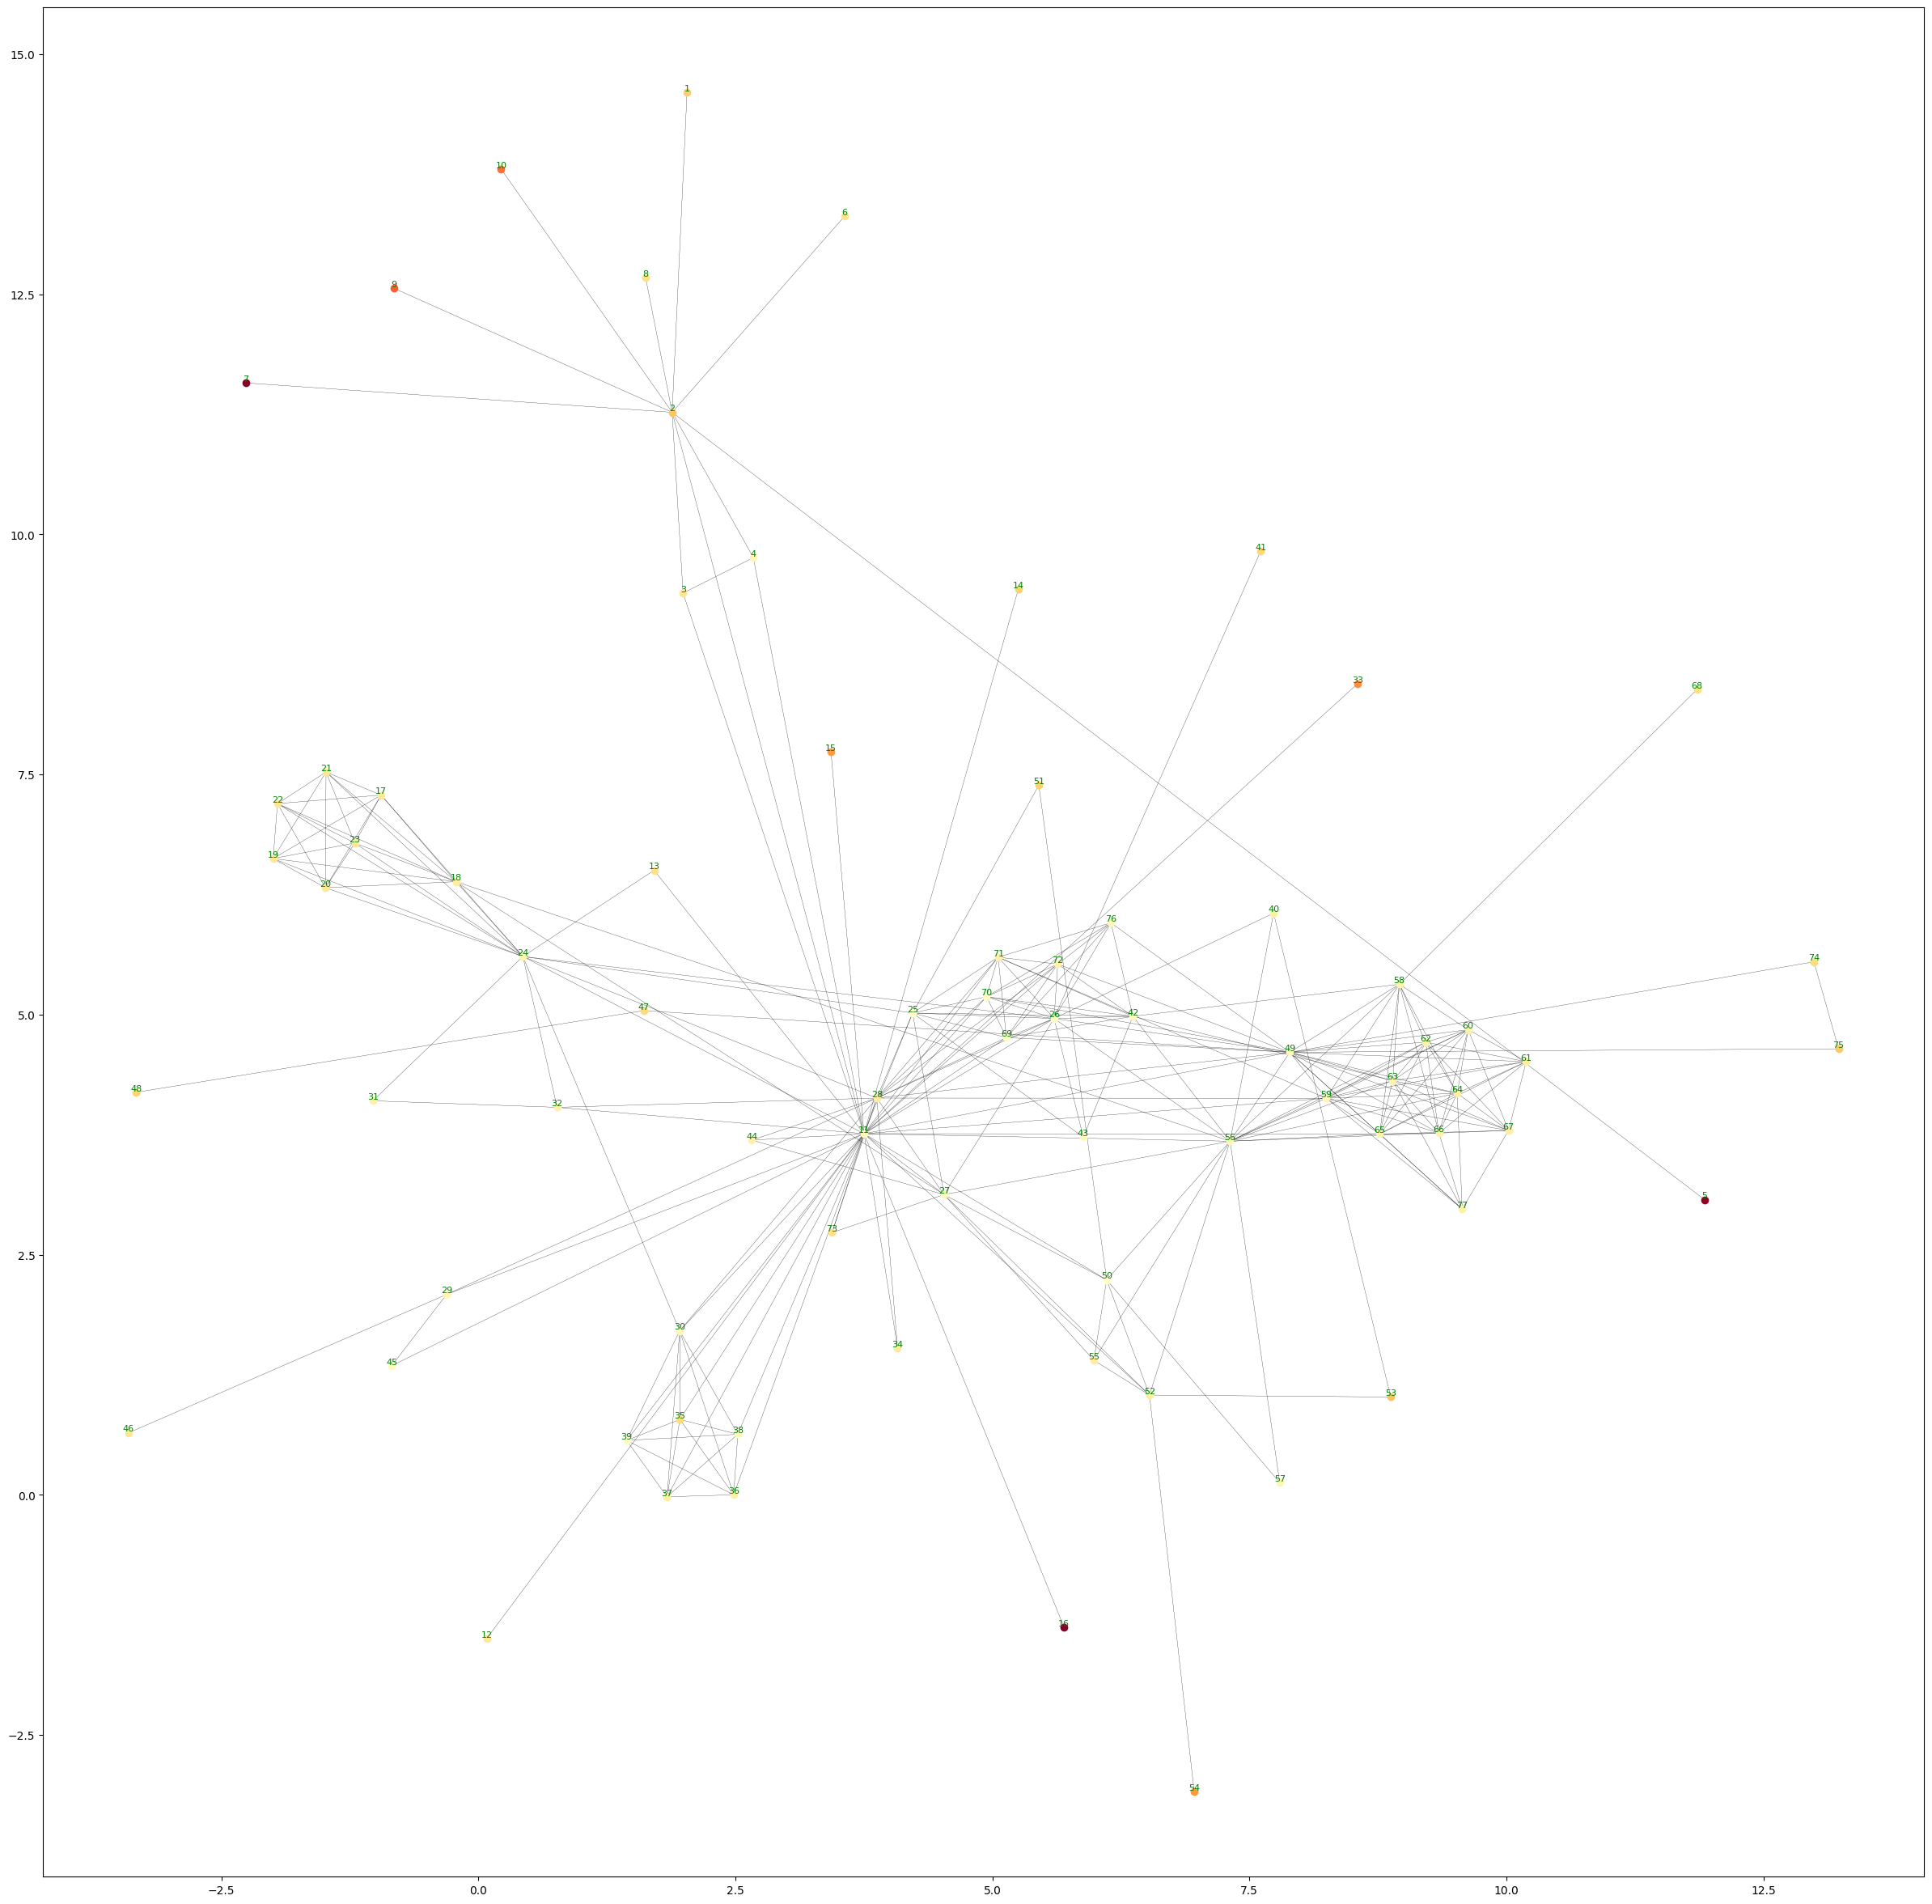

In [5]:
fig,axs = plt.subplots(1,1,figsize=(30,30))
create_forced_graph(axs,graph,1000)

189


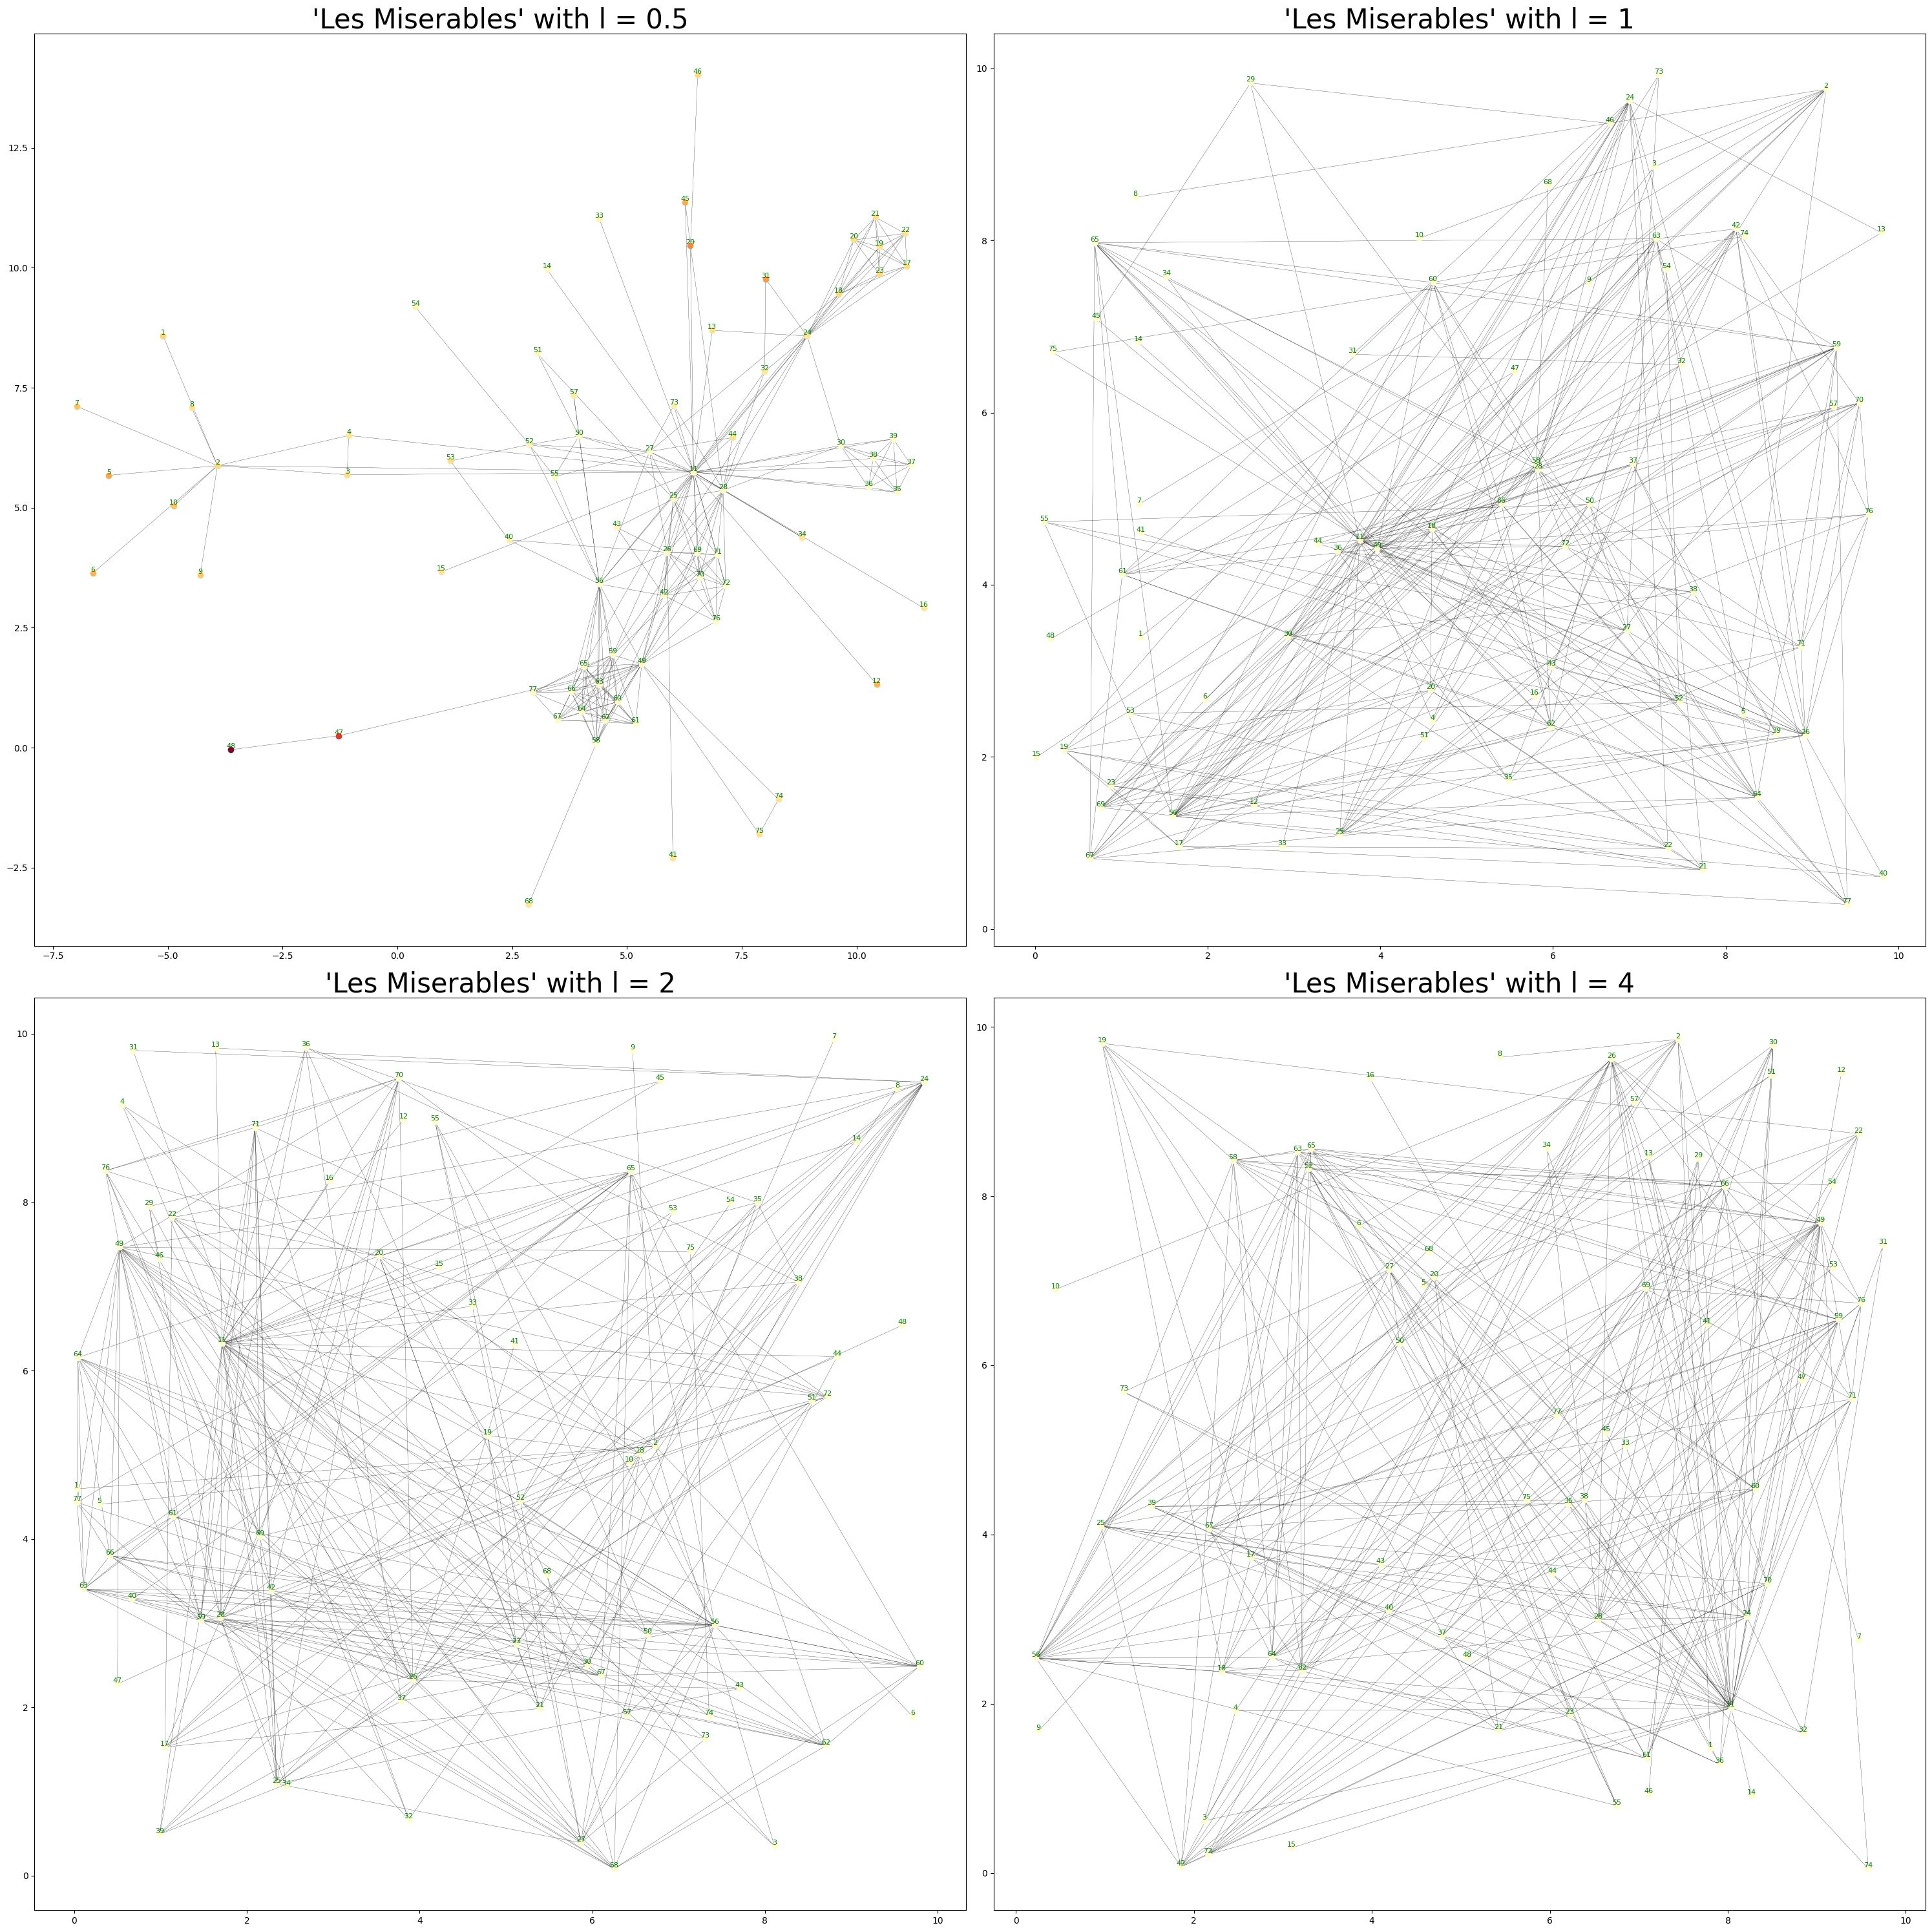

In [6]:

fig,axs = plt.subplots(2,2,figsize=(30,30))
threshold = 0.05
learning_rate = 0.1

create_forced_graph(axs[0][0],graph,500,2,1,0.5,threshold,learning_rate,"'Les Miserables' with l = 0.5")
create_forced_graph(axs[0][1],graph,0,2,1,1,threshold,learning_rate,"'Les Miserables' with l = 1")
create_forced_graph(axs[1][0],graph,0,2,1,2,threshold,learning_rate,"'Les Miserables' with l = 2")
create_forced_graph(axs[1][1],graph,0,2,1,4,threshold,learning_rate,"'Les Miserables' with l = 4")
# les Miserables graph num itration = 427 (because of the threshold = 0.05 and the learning rate = 0.1 which decreaces over time.

plt.tight_layout()
plt.show()
